### Faza 4

- zrobienie nowych kopii danych 
- zmienienie nazw kolumn
- usuniecie niepotrzebnych danych

In [41]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import shutil

In [42]:
og = '../data/Gaming_Hours_vs_Performance_1000_Rows.csv'
cp = '../data/gaming_performance.csv'
shutil.copy(og, cp)

'../data/gaming_performance.csv'

In [43]:
df = pd.read_csv("../data/gaming_performance.csv")
df.head()

,User_ID,Age,Gender,Occupation,Game_Type,Daily_Gaming_Hours,Weekly_Gaming_Hours,Primary_Gaming_Time,Sleep_Hours,Stress_Level,Focus_Level,Academic_or_Work_Score,Productivity_Level,Performance_Impact
0,U0001,21,Male,Working Professional,Action,4.0,28.0,Morning,4.6,6,4,69,66,Negative
1,U0002,35,Female,Student,Sports,1.0,7.0,Night,5.4,2,7,67,72,Neutral
2,U0003,26,Male,Student,Puzzle,2.0,14.0,Morning,8.0,4,8,82,82,Positive
3,U0004,32,Male,Working Professional,Action,1.0,7.0,Night,4.9,7,7,71,66,Neutral
4,U0005,19,Male,Working Professional,Action,2.1,14.7,Morning,7.0,7,7,67,63,Neutral


#### Drop tables

In [44]:
df = df.drop(columns=['User_ID', 'Weekly_Gaming_Hours', 'Productivity_Level', 'Performance_Impact'])
df.head()

,Age,Gender,Occupation,Game_Type,Daily_Gaming_Hours,Primary_Gaming_Time,Sleep_Hours,Stress_Level,Focus_Level,Academic_or_Work_Score
0,21,Male,Working Professional,Action,4.0,Morning,4.6,6,4,69
1,35,Female,Student,Sports,1.0,Night,5.4,2,7,67
2,26,Male,Student,Puzzle,2.0,Morning,8.0,4,8,82
3,32,Male,Working Professional,Action,1.0,Night,4.9,7,7,71
4,19,Male,Working Professional,Action,2.1,Morning,7.0,7,7,67


#### Change columns

In [45]:
df_modify = df
df_modify = df_modify.rename(columns={"Primary_Gaming_Time": "Gaming_Time", "Daily_Gaming_Hours": "Gaming_Hours", "Academic_or_Work_Score": "Score"})
df_modify = pd.get_dummies(df_modify, columns=['Gender', 'Occupation'], drop_first=True, dtype=int)
df_modify.head(5)

,Age,Game_Type,Gaming_Hours,Gaming_Time,Sleep_Hours,Stress_Level,Focus_Level,Score,Gender_Male,Occupation_Working Professional
0,21,Action,4.0,Morning,4.6,6,4,69,1,1
1,35,Sports,1.0,Night,5.4,2,7,67,0,0
2,26,Puzzle,2.0,Morning,8.0,4,8,82,1,0
3,32,Action,1.0,Night,4.9,7,7,71,1,1
4,19,Action,2.1,Morning,7.0,7,7,67,1,1


In [46]:
df_modify.columns = df_modify.columns.str.lower()
df_modify = pd.get_dummies(df_modify, columns=["gaming_time", "game_type"],drop_first=True, dtype=int)
df_modify.head()

,age,gaming_hours,sleep_hours,stress_level,focus_level,score,gender_male,occupation_working professional,gaming_time_Morning,gaming_time_Night,game_type_Casual,game_type_Puzzle,game_type_Simulation,game_type_Sports,game_type_Strategy
0,21,4.0,4.6,6,4,69,1,1,1,0,0,0,0,0,0
1,35,1.0,5.4,2,7,67,0,0,0,1,0,0,0,1,0
2,26,2.0,8.0,4,8,82,1,0,1,0,0,1,0,0,0
3,32,1.0,4.9,7,7,71,1,1,0,1,0,0,0,0,0
4,19,2.1,7.0,7,7,67,1,1,1,0,0,0,0,0,0


##### Oznaczenia

- Gaming time
    - Morning 0 Night 0 to Evening
    - Morning 1 -> to morning
    - Night 1 -> to night
- Occupation
    - 1 -> Osoba pracujaca
    - 0 -> Student
- Gender_male
    - 1 -> True
    - 0 -> False -> Female
- game_type analogicznie
    - 1 -> Dana kategoria
    - Wszedzie 0 -> kategoria: Action

In [47]:
df = df_modify
df.head(5)

,age,gaming_hours,sleep_hours,stress_level,focus_level,score,gender_male,occupation_working professional,gaming_time_Morning,gaming_time_Night,game_type_Casual,game_type_Puzzle,game_type_Simulation,game_type_Sports,game_type_Strategy
0,21,4.0,4.6,6,4,69,1,1,1,0,0,0,0,0,0
1,35,1.0,5.4,2,7,67,0,0,0,1,0,0,0,1,0
2,26,2.0,8.0,4,8,82,1,0,1,0,0,1,0,0,0
3,32,1.0,4.9,7,7,71,1,1,0,1,0,0,0,0,0
4,19,2.1,7.0,7,7,67,1,1,1,0,0,0,0,0,0


### Podzial danych
Dane zostana podzielone w proporcjach 7:2:1 na zbiory treningowy, walidacyjny, testowy

In [48]:
from sklearn.model_selection import train_test_split

y = df.score
x = df.drop(columns='score')

#zbior testowy
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


print(x_train.count())
print(x_test.count())

age                                700
gaming_hours                       700
sleep_hours                        700
stress_level                       700
focus_level                        700
gender_male                        700
occupation_working professional    700
gaming_time_Morning                700
gaming_time_Night                  700
game_type_Casual                   700
game_type_Puzzle                   700
game_type_Simulation               700
game_type_Sports                   700
game_type_Strategy                 700
dtype: int64
age                                300
gaming_hours                       300
sleep_hours                        300
stress_level                       300
focus_level                        300
gender_male                        300
occupation_working professional    300
gaming_time_Morning                300
gaming_time_Night                  300
game_type_Casual                   300
game_type_Puzzle                   300
game_type_Si

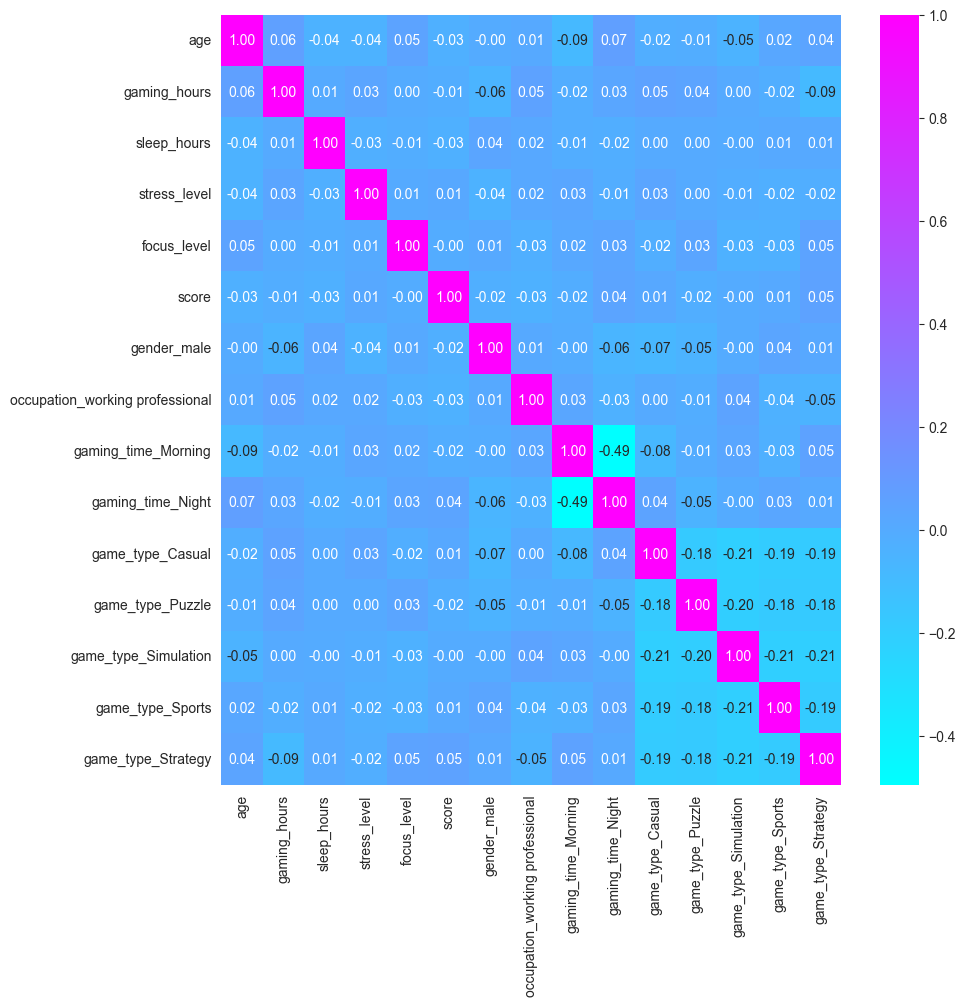

In [49]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sn.heatmap(data=df.corr(), annot=True, cmap="cool", fmt=".2f")

### Regresja linniowa

In [50]:
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [51]:
model = linear_model.LinearRegression()

In [52]:
print(x_train.shape)

(700, 14)


In [53]:
model.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [54]:
y_pred = model.predict(x_test)

In [55]:
print("Coefficents: ", model.coef_)
print("Intercept: %.2f" % model.intercept_)
print('Mean square error: %.2f' % mean_squared_error(y_test, y_pred))
print("MAE: %.2f" % mean_absolute_error(y_test, y_pred))
print("R^2 score %.3f" % r2_score(y_test, y_pred))


Coefficents:  [-0.12783536 -0.17650207 -0.34350581 -0.01509848 -0.15392644  0.20904289
 -0.82560714 -0.66413061  1.11524628  1.83853315  1.32814641  0.01514034
  1.3090124   2.45017063]
Intercept: 81.62
Mean square error: 140.85
MAE: 10.34
R^2 score -0.030


In [56]:
print(df.drop(columns="score").columns)

Index(['age', 'gaming_hours', 'sleep_hours', 'stress_level', 'focus_level',
       'gender_male', 'occupation_working professional', 'gaming_time_Morning',
       'gaming_time_Night', 'game_type_Casual', 'game_type_Puzzle',
       'game_type_Simulation', 'game_type_Sports', 'game_type_Strategy'],
      dtype='object')


<Axes: ylabel='score'>

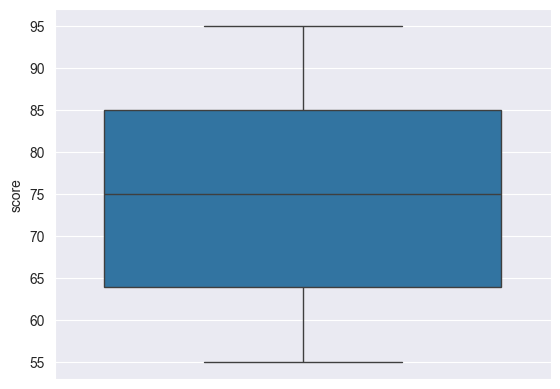

In [57]:
sn.boxplot(y_test)

<Axes: >

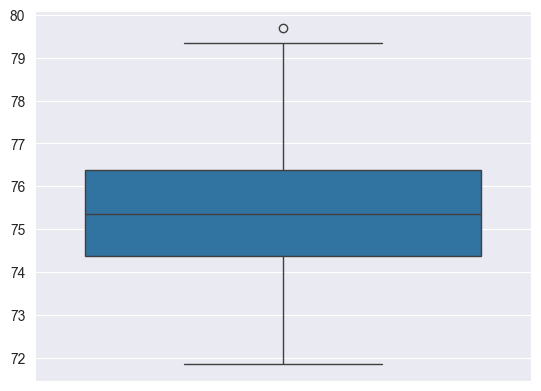

In [58]:
sn.boxplot(y_pred)

In [59]:
waga_df = pd.DataFrame({"Cecha: ": df.drop(columns="score").columns, 'Waga': model.coef_})
waga_df.sort_values(by='Waga', ascending=False)

,Cecha:,Waga
13,game_type_Strategy,2.450171
9,game_type_Casual,1.838533
10,game_type_Puzzle,1.328146
12,game_type_Sports,1.309012
8,gaming_time_Night,1.115246
5,gender_male,0.209043
11,game_type_Simulation,0.015140
3,stress_level,-0.015098
0,age,-0.127835
4,focus_level,-0.153926


In [60]:
df.corr()["score"].sort_values(ascending=False)

score                              1.000000
game_type_Strategy                 0.052472
gaming_time_Night                  0.037623
game_type_Casual                   0.014614
stress_level                       0.013398
game_type_Sports                   0.008963
game_type_Simulation              -0.003911
focus_level                       -0.004908
gaming_hours                      -0.012049
gaming_time_Morning               -0.015293
game_type_Puzzle                  -0.017448
gender_male                       -0.022629
age                               -0.028235
sleep_hours                       -0.030080
occupation_working professional   -0.033654
Name: score, dtype: float64

### Korelacja pokazala, że regresja linniowa dla tych danych jest kompletnie bez sensu

- Korelacja Score z innymi wartosciami to pokazuje ponieważ najwieksza wartosc |corr| wynosi 0.05
- Z braku silnej korelacji z cechami zaszlo zjawisko Regression toward the mean


## KNN REGRESSION

In [116]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
n = 1

min_mae = 95
min_rmse = 95
max_r2 = -10000
mae_score = {}
for n in range(1,100):
    pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsRegressor(n_neighbors=n))
])
    pipeline.fit(x_train, y_train)
    y_pred = pipeline.predict(x_test)
    mae = np.round(mean_absolute_error(y_test, y_pred),2)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred)).round(2)
    r2 = np.round(r2_score(y_test, y_pred),2)
    mae_score[n] = mae
    if mae < min_mae:
        min_mae = mae
        # print(mae)
    if rmse < min_rmse:
        min_rmse = rmse
        # print(rmse)
    if r2 > max_r2:
        max_r2 = r2
        # print(r2)



print("MAE:", min_mae)
print("RMSE:", min_rmse)
print("R2:", max_r2)

MAE: 10.16
RMSE: 11.69
R2: -0.0


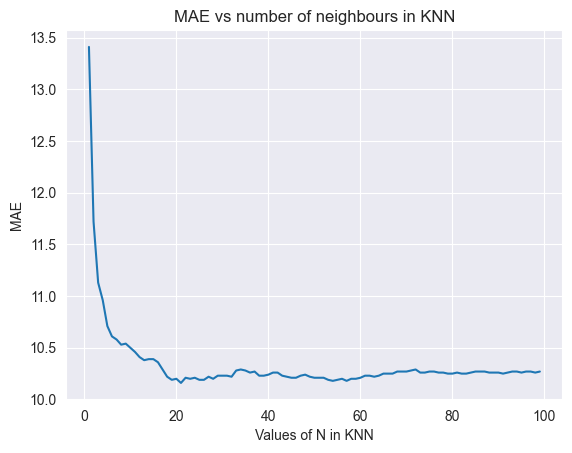

In [117]:
n_values = list(mae_score.keys())
mae_values = list(mae_score.values())
plt.plot(n_values, mae_values)
plt.xlabel("Values of N in KNN")
plt.ylabel("MAE")
plt.title("MAE vs number of neighbours in KNN")
plt.show()


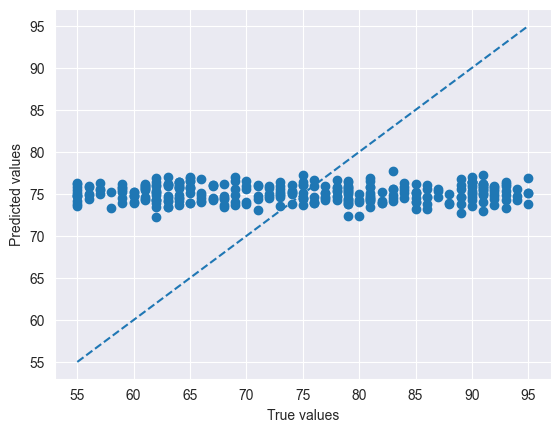

In [118]:
plt.scatter(y_test, y_pred)
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         linestyle="--")
plt.show()


#### KNN nie pasuje do danych
- MAE na poziomie 25%


In [119]:
df.head()

,age,gaming_hours,sleep_hours,stress_level,focus_level,score,gender_male,occupation_working professional,gaming_time_Morning,gaming_time_Night,game_type_Casual,game_type_Puzzle,game_type_Simulation,game_type_Sports,game_type_Strategy
0,21,4.0,4.6,6,4,69,1,1,1,0,0,0,0,0,0
1,35,1.0,5.4,2,7,67,0,0,0,1,0,0,0,1,0
2,26,2.0,8.0,4,8,82,1,0,1,0,0,1,0,0,0
3,32,1.0,4.9,7,7,71,1,1,0,1,0,0,0,0,0
4,19,2.1,7.0,7,7,67,1,1,1,0,0,0,0,0,0


In [159]:
df_knn = ['game_type_Casual', 'game_type_Puzzle', "game_type_Simulation",'game_type_Sports','game_type_Strategy']
x_train_limited = x_train[df_knn]
x_test_limited = x_test[df_knn]

pipeline = Pipeline([
("scaler", StandardScaler()),
("knn", KNeighborsRegressor(n_neighbors=22))
])
pipeline.fit(x_train, y_train)
y_pred = pipeline.predict(x_test)
mae = np.round(mean_absolute_error(y_test, y_pred),2)
rmse = np.sqrt(mean_squared_error(y_test, y_pred)).round(2)
r2 = np.round(r2_score(y_test, y_pred),2)

print("MAE:", mae)
print("RMSE:", rmse)
print("R2:", r2)

MAE: 10.21
RMSE: 11.86
R2: -0.03
